In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
%matplotlib inline

In [134]:
%run ../Modules/Importing.py

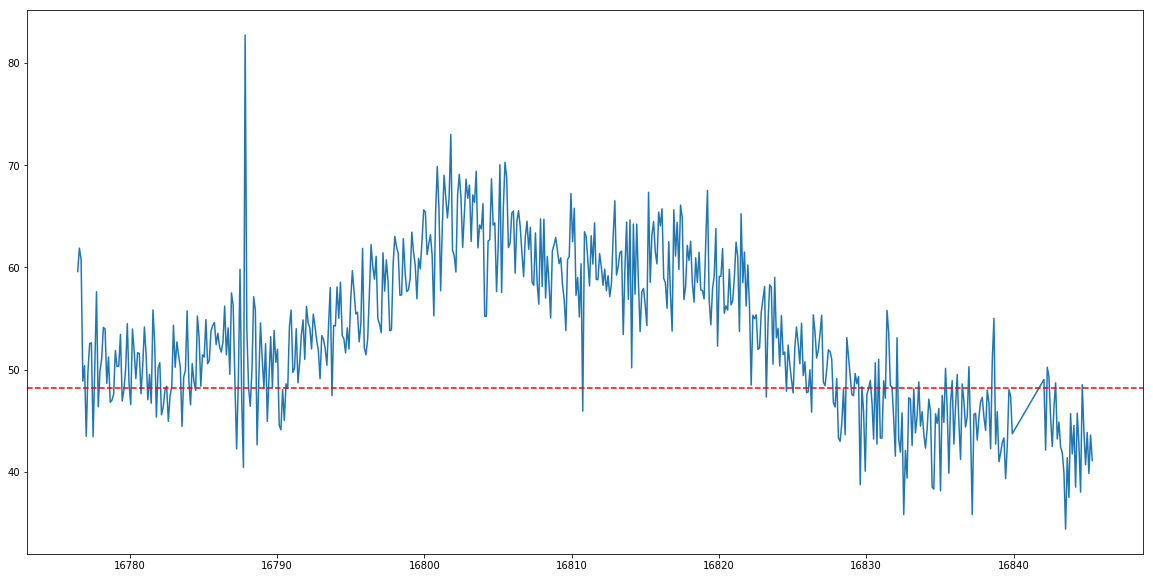

In [192]:
x1 = pd.read_csv('/Users/ballanr/Desktop/File Outputs/DR15/Wave and Flux/9753-57859-007.csv',index_col=False)
wave2 = x1['Wavelength']
flux2 = x1['Flux']
err2 = x1['Error']

emission1,bleh,blehh = f.Barycentric_Correction(11,0)
center1 = f.find_nearest(wave2,emission1)

wave1 = np.asarray(wave2[center1-301:center1+301])
flux1 = np.asarray(flux2[center1-301:center1+301])
err1 = np.asarray(err2[center1-301:center1+301])

L1 = 0
L2 = 151
R1 = 451
R2 = 602
Fc = (np.sum(flux1[L1:L2]) + np.sum(flux1[R1:R2])) / (len(flux1[L1:L2]) + len(flux1[R1:R2]))

plt.figure(figsize=(20,10))
plt.plot(wave1,flux1);
plt.axhline(Fc,color='red',ls='dashed');

In [81]:
from PyAstronomy.pyasl import helcorr as hell
from astropy.io import fits

# APO

APO is apache point observatory: Latitude 32° 46' 49" N, Longitude 105° 49' 13" W, Elevation 2788 meters

In [173]:
filename = '/Volumes/CoveyData/APOGEE_Spectra/preDR15/apogee/spectro/redux/visits/apo25m/9753/57859/apVisit-apogee2-9753-57859-002.fits'
openfile = fits.open(filename)
header = openfile[0].header
header['BC'],header['RA'],header['DEC'],header['HJD']

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/CoveyData/APOGEE_Spectra/preDR15/apogee/spectro/redux/visits/apo25m/9753/57859/apVisit-apogee2-9753-57859-002.fits'

In [124]:
x = hell(-105.4913,36.4649,2788,82.8615778146,11.0229465933,2457650.9389914)

In [125]:
x

(29.074256766486499, 2457650.9393496192)

In [126]:
x[0]/header['BC'],header['BC']-x[0]

(0.9996542628544216, 0.010055527113500773)

# LCO

LCO is Las Campanas Observatory: Latitude 29° 0′ 52.56″ S, Longitude 70° 41′ 33.36″ W, Elevation 2380m

In [179]:
filename = '/Volumes/CoveyData/APOGEE_Spectra/preDR15/apogee/spectro/redux/visits/lco25m/9856/57942/asVisit-apogee2-9856-57942-003.fits'
openfile = fits.open(filename)
header = openfile[0].header
header['BC'],header['RA'],header['DEC'],header['HJD']

(25.5468356993, 347.230220488, -5.085581975, 57942.8861364)

In [187]:
jd = header['JD-MID']
jd

2457942.88321

In [184]:
x = hell(-70.413336,-29.05256,2380,347.230220488, -5.085581975, 2457942.8861364)

In [185]:
x

(25.305818217541191, 2457942.8890411896)

In [186]:
x[0]/header['BC'],header['BC']-x[0]

(0.99056566204144747, 0.24101748175880999)

In [158]:
import pandas as pd
from astropy.io import fits as fits
import numpy as np
import itertools

In [159]:
dr15table = pd.read_csv('/Users/ballanr/Desktop/File Outputs/forMdot_analysis.csv')
cols = ['Location ID','2Mass ID', 'Plate ID','MJD','Fiber','Telescope','Header BC','HelCorr BC','Difference (m/s)']
df = pd.DataFrame(columns=cols)

In [160]:
rowstart = 0
g = 0
for index,row in itertools.islice(dr15table.iterrows(),rowstart,None):
    try:
        g+=1
        loc = row['LOCID']
        twomass = row['2MASS_ID']
        print(str(g))
        plateid = row['PLATE']
        mjd = row['MJD']
        
        if len(str(row['FIB'])) == 3:
            fiber = str(row['FIB'])
        elif len(str(row['FIB'])) == 2:
            fiber = '0' + str(row['FIB']) 
        else:
            fiber = '00' + str(row['FIB'])
            
        fitsfile = row['path-to-file-on-CoveyData']
        openfile = fits.open(fitsfile)
        header = openfile[0].header
        
        bc = header['BC']
        ra = header['RA']
        dec = header['DEC'] 
        jd = 2.4*(10**6)+header['HJD']
        telescope = header['TELESCOP']
        
        if telescope == 'apo25m':
            height = 2788
            long = -105.4913
            lat = 36.4649
        else:
            height = 2380
            long = -70.413336
            lat = -29.05256
        
        x = hell(long,lat,height,ra,dec,jd)
        difference = (bc - x[0])*1000
        data = [loc,twomass,plateid,mjd,fiber,telescope,bc,x[0],difference]
        df.loc[len(df)+1] = data
        openfile.close()
        
    except KeyError:
        print('Row '+str(g)+' has no BC value...')
            #problems.append((loc,twomass,plateid,mjd,fiber,'KeyError'))
        openfile.close()
        
    except FileNotFoundError:
        print('Row '+str(g)+' doesn\'t exist...')
            #problems.append((loc,twomass,plateid,mjd,fiber,'FileNotFound'))
        openfile.close()
            
df.to_csv('/Users/ballanr/Desktop/File Outputs/DR15/BC Test.csv',index=False)

1
Row 1 has no BC value...
2
Row 2 has no BC value...
3
4
5
Row 5 has no BC value...
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Row 24 has no BC value...
25
26
27
28
Row 28 has no BC value...
29
30
31
32
33
Row 33 has no BC value...
34
35
36
37
38
39
40
41
42
43
44
45
46
47
Row 47 has no BC value...
48
Row 48 has no BC value...
49
50
51
52
53
54
Row 54 has no BC value...
55
56
57
58
59
60
61
Row 61 has no BC value...
62
63
64
65
Row 65 has no BC value...
66
Row 66 has no BC value...
67
68
69
70
71
72
73
74
Row 74 has no BC value...
75
76
77
Row 77 has no BC value...
78
Row 78 has no BC value...
79
80
Row 80 has no BC value...
81
82
Row 82 has no BC value...
83
84
85
86
87
Row 87 has no BC value...
88
Row 88 has no BC value...
89
Row 89 has no BC value...
90
91
Row 91 has no BC value...
92
93
94
95
96
Row 96 has no BC value...
97
98
Row 98 has no BC value...
99
Row 99 has no BC value...
100
Row 100 has no BC value...
101
Row 101 has no BC value...
102
Row 102 has no BC value..

In [161]:
file = pd.read_csv('/Users/ballanr/Desktop/File Outputs/DR15/BC Test.csv')
difference = file['Difference (m/s)']

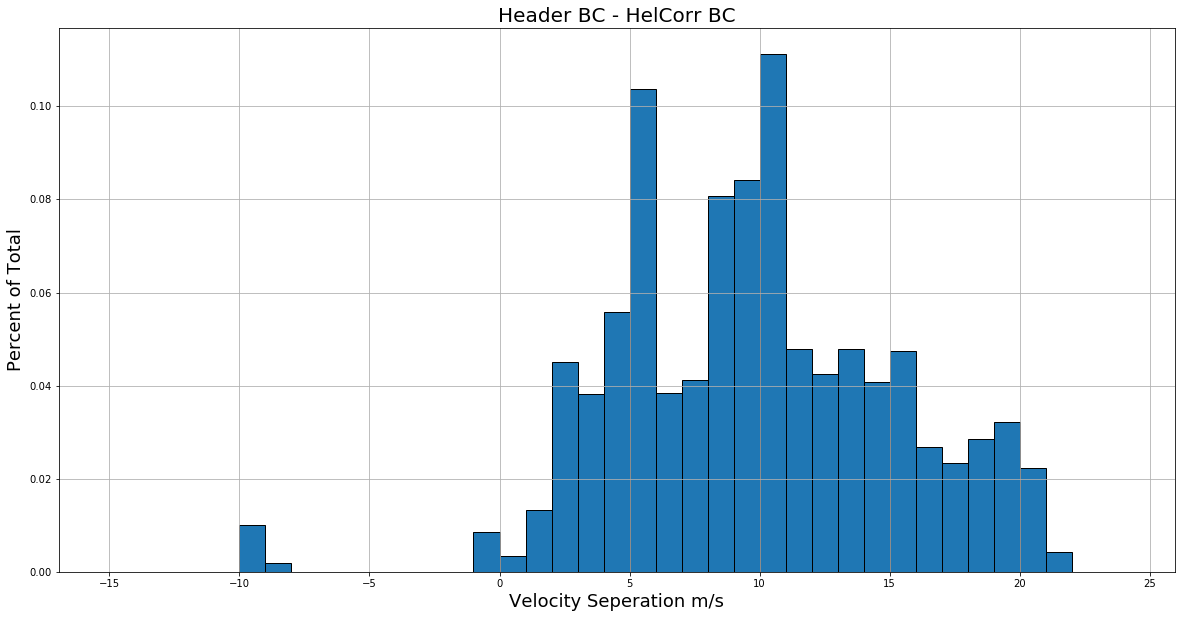

In [165]:
plt.figure(figsize=(20,10))
weights = np.ones_like(difference)/float(len(difference))
plt.hist(difference,bins=np.arange(-15,25,1),weights=weights,edgecolor = 'black');
plt.xlabel('Velocity Seperation m/s',fontsize=18);
plt.ylabel('Percent of Total',fontsize=18);
plt.title('Header BC - HelCorr BC',fontsize = 20);
plt.grid(True)
plt.savefig('/Users/ballanr/Desktop/File Outputs/DR15/BC Hist.pdf',dpi = 300);

In [166]:
gg = np.asarray(difference)

In [167]:
gg = np.abs(gg)

In [168]:
gg

array([ 9.5819391 ,  9.57166878,  9.59620175, ...,  9.14016572,
        9.06531128,  9.15598773])

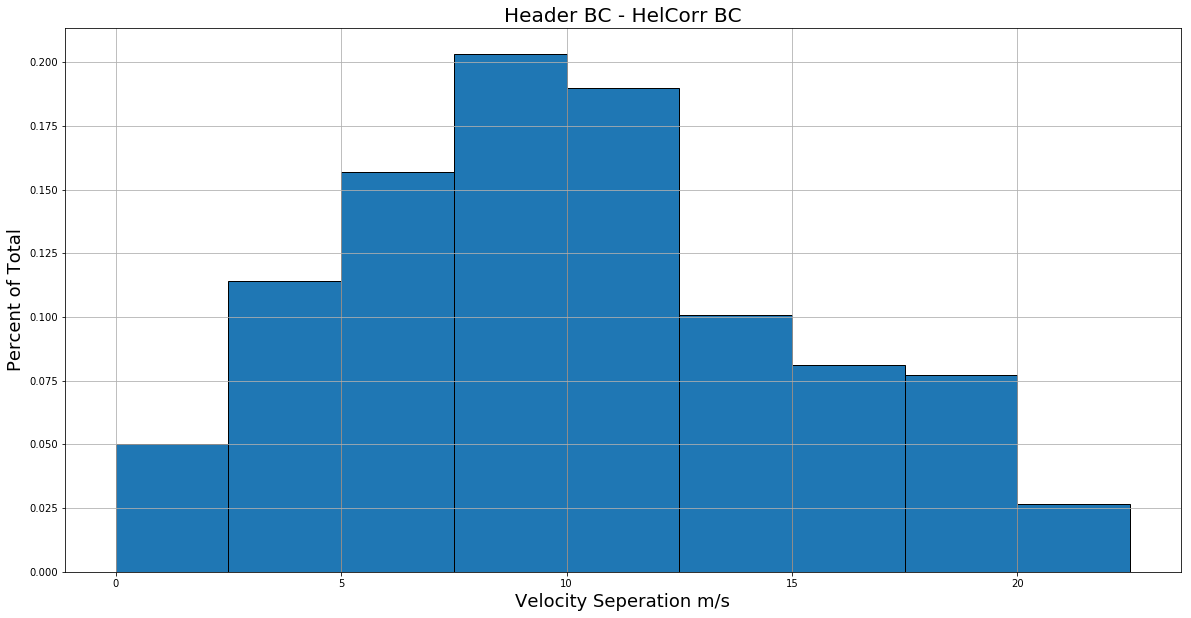

In [171]:
plt.figure(figsize=(20,10))
weights = np.ones_like(gg)/float(len(gg))
plt.hist(gg,bins=np.arange(0,25,2.5),weights=weights,edgecolor = 'black');
plt.xlabel('Velocity Seperation m/s',fontsize=18);
plt.ylabel('Percent of Total',fontsize=18);
plt.title('Header BC - HelCorr BC',fontsize = 20);
plt.grid(True)
#plt.savefig('/Users/ballanr/Desktop/File Outputs/DR15/BC Hist.pdf',dpi = 300);

In [ ]:
bbbb

In [1]:
import numpy as np
import pandas as pd

In [32]:
df8 = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density 8 Ratios testcase.csv',usecols=(8,9,10,11,12,13,14))
df11 = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density 11 Ratios testcase.csv',usecols=(8,9,10,11,12,13,14))

In [62]:
A = np.asarray([1,0.802011438,0.652139617,0.534214159,0.441135871,0.361861566,0.301124039,0.252612897,0.213172944,0.181561822])
A1 = np.asarray([1,0.796052632,0.644942434,0.527754934,0.436677632,0.359786184,0.300164474,0.252467105,0.213610197,0.182442434])
A2 = np.asarray([1,0.881554131,0.760090532,0.648811769,0.55186722,0.470011316,0.401357978,0.344662392,0.297246322,0.257600905])
b = [1,1.024178045,0.767604629,0.84560514,0.491509042,0.448962594,0.365232136,0.314040915,0.214283097,0.163918628]

In [63]:
r = b-A
r1 = b-A1
r2 = b-A2

In [61]:
re = 0
re1 = 0
re2 = 0
for i in range(len(r)):
    
    re += (r[i])**2
    re1 += (r1[i])**2
    re2 += (r2[i])**2
    
re = np.sqrt(re)
re1 = np.sqrt(re1)
re1 = np.sqrt(re2)

re,re1

(0.4218700309052798, 0.43294757894594493)

In [65]:
df1 = df8.as_matrix(columns=None)

In [66]:
df1

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ],
       [ 0.80201144,  0.79605263,  0.78911861,  0.78650935,  0.78435856,
         0.77961216,  0.77289932],
       [ 0.65213962,  0.64494243,  0.63525571,  0.63156723,  0.62863023,
         0.62185535,  0.61241484],
       [ 0.53421416,  0.52775493,  0.51751904,  0.5135797 ,  0.51040476,
         0.50340671,  0.49318698],
       [ 0.44113587,  0.43667763,  0.42676823,  0.42297418,  0.41984907,
         0.41325996,  0.40386071],
       [ 0.36186157,  0.35978618,  0.35321001,  0.35017809,  0.34781615,
         0.34224319,  0.33387585],
       [ 0.30112404,  0.30016447,  0.29466812,  0.29229742,  0.2901898 ,
         0.28563941,  0.27831188],
       [ 0.2526129 ,  0.25246711,  0.24809576,  0.24599288,  0.24445461,
         0.24043501,  0.2342165 ],
       [ 0.21317294,  0.2136102 ,  0.21038085,  0.2086821 ,  0.20731763,
         0.20403564,  0.1987888 ],
       [ 0.18156182,  0.1824

In [70]:
df2 = np.transpose(df1)

In [72]:
df2[0]

array([ 1.        ,  0.80201144,  0.65213962,  0.53421416,  0.44113587,
        0.36186157,  0.30112404,  0.2526129 ,  0.21317294,  0.18156182])

In [81]:
residual = []
for i in range(len(df2)):
    r = b - df2[i]
    r2 = 0
    for k in range(len(r)):
        r2 += (r[k])**2
    r2 = np.sqrt(r2)
    residual.append(r2)

In [82]:
residual

[0.4218700309052798,
 0.43294757894594493,
 0.45095650486598327,
 0.45812397397205379,
 0.46395136038756507,
 0.47711308328519358,
 0.49654306669263382]

In [93]:
temps = [3750,5000,7500,8750,10000,12500,15000]
density = np.arange(8,12.6,0.2)

In [95]:
cols = []
for i in range(len(density)):
    for k in range(len(temps)):
        string = str(density[i])+'/'+str(temps[k])
        cols.append(string)

In [96]:
cols

['8.0/3750',
 '8.0/5000',
 '8.0/7500',
 '8.0/8750',
 '8.0/10000',
 '8.0/12500',
 '8.0/15000',
 '8.2/3750',
 '8.2/5000',
 '8.2/7500',
 '8.2/8750',
 '8.2/10000',
 '8.2/12500',
 '8.2/15000',
 '8.4/3750',
 '8.4/5000',
 '8.4/7500',
 '8.4/8750',
 '8.4/10000',
 '8.4/12500',
 '8.4/15000',
 '8.6/3750',
 '8.6/5000',
 '8.6/7500',
 '8.6/8750',
 '8.6/10000',
 '8.6/12500',
 '8.6/15000',
 '8.8/3750',
 '8.8/5000',
 '8.8/7500',
 '8.8/8750',
 '8.8/10000',
 '8.8/12500',
 '8.8/15000',
 '9.0/3750',
 '9.0/5000',
 '9.0/7500',
 '9.0/8750',
 '9.0/10000',
 '9.0/12500',
 '9.0/15000',
 '9.2/3750',
 '9.2/5000',
 '9.2/7500',
 '9.2/8750',
 '9.2/10000',
 '9.2/12500',
 '9.2/15000',
 '9.4/3750',
 '9.4/5000',
 '9.4/7500',
 '9.4/8750',
 '9.4/10000',
 '9.4/12500',
 '9.4/15000',
 '9.6/3750',
 '9.6/5000',
 '9.6/7500',
 '9.6/8750',
 '9.6/10000',
 '9.6/12500',
 '9.6/15000',
 '9.8/3750',
 '9.8/5000',
 '9.8/7500',
 '9.8/8750',
 '9.8/10000',
 '9.8/12500',
 '9.8/15000',
 '10.0/3750',
 '10.0/5000',
 '10.0/7500',
 '10.0/8750',
 '10

In [97]:
mdf = pd.DataFrame(columns = cols)

In [163]:
somearray = []
for i in range(len(density)):
    
    filepath = '/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density ' + str(density[i]) + ' Ratios.csv'
    openfile = pd.read_csv(filepath,usecols=(1,2,3,4,5,6,7))
    #penfile = np.transpose(openfile)
    
    for column,data in itertools.islice(openfile.iteritems(),0,None):
        #print(column)
        #print(data)
        somearray.append(np.asarray(data))

In [167]:
for i in range(len(somearray)):
    colname = cols[i]
    mdf[colname] = somearray[i]

In [170]:
mdf.to_csv('/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Superfuntestfile.csv',index=False)

In [231]:
allfile = '/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Superfuntestfile.csv'
openallfile = pd.read_csv(allfile)

In [232]:
resid = []
for i in range(len(cols)):
    
    A = openallfile[cols[i]]
    b = [1,1.024178045,0.767604629,0.84560514,0.491509042,0.448962594,0.365232136,0.314040915,0.214283097,0.163918628]
    
    A = A / A[0]
    
    r = b - A
    
    r2 = 0
    
    for k in range(len(r)):
        
        r2 += (r[k])**2
    
    r2 = np.sqrt(r2)
    resid.append((i,r2))

In [233]:
len(resid)

161

In [234]:
x = min(b for (a,b) in resid)

In [235]:
np.where(resid == x)

(array([148]), array([1]))

In [198]:
resid[148]

(148, 1.4779863453453448)

In [217]:
g1 = openallfile['11.6/15000']
g2 = openallfile['12.2/5000']

In [228]:
gg = b - g1
ggg = b-g2
for i in range(len(b)):
    print(b[i],'\t','\t',g1[i])
for i in range(len(b)):
    print(b[i],'\t','\t',g2[i])

1 	 	 0.7473
1.024178045 	 	 0.758
0.767604629 	 	 0.7326
0.84560514 	 	 0.6834
0.491509042 	 	 0.6226
0.448962594 	 	 0.5589
0.365232136 	 	 0.4975
0.314040915 	 	 0.441
0.214283097 	 	 0.3901
0.163918628 	 	 0.3451
1 	 	 0.2875
1.024178045 	 	 0.2534
0.767604629 	 	 0.2182
0.84560514 	 	 0.1859
0.491509042 	 	 0.1577
0.448962594 	 	 0.134
0.365232136 	 	 0.1142
0.314040915 	 	 0.09781
0.214283097 	 	 0.08418
0.163918628 	 	 0.0728


In [220]:
np.sqrt(np.sum((gg)**2))

0.53746312961235709

In [222]:
np.sqrt(np.sum((ggg)**2))

1.4779863453453448

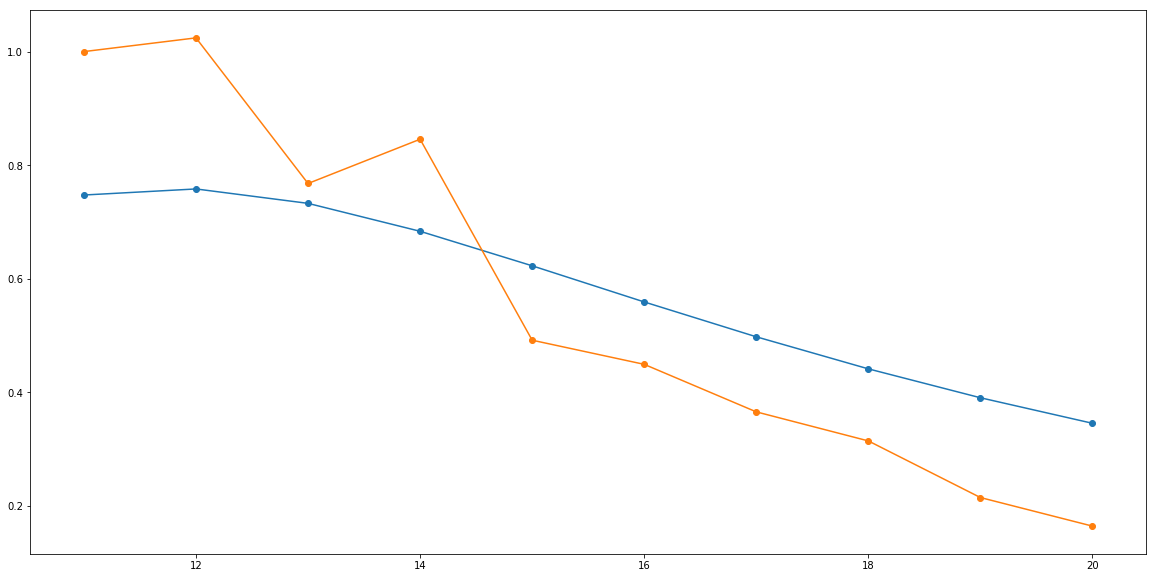

In [236]:
plt.figure(figsize=(20,10));
plt.plot(np.arange(11,21,1),g1);
plt.plot(np.arange(11,21,1),b);
plt.scatter(np.arange(11,21,1),g1);
plt.scatter(np.arange(11,21,1),b);